### İsmail Ata İnan
### 2017400129

# Assignment 2 Answers

## Question 1

First, we create the $v$ vector.

In [44]:
import numpy as np

v = np.array([4, -1])
v

array([ 4, -1])

### a)

To rotate a $1x2$ vector by $\theta$ degrees counterclockwise, we use the rotation matrices that has the form $\begin{bmatrix}
cos \theta & -sin \theta\\
sin \theta & cos \theta
\end{bmatrix}$. So we must have $R = \begin{bmatrix}
cos30 & -sin30\\
sin30 & cos30
\end{bmatrix} = \begin{bmatrix}
\sqrt{3}/2 & -1/2\\
1/2 & \sqrt{3}/2
\end{bmatrix}$.

To make sure of the calculations, we do them from scratch in the code to obtain $R$.

In [45]:
theta_v = np.radians(30)
R = np.array([[np.cos(theta_v), -np.sin(theta_v)], [np.sin(theta_v), np.cos(theta_v)]])
R

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

### b)

To project a $1x2$ vector representing a point on the $(x,y)$ plane to a line $l$ inclined $\theta$ degrees with respect tp horizontal, we use the projection matrices that has the form $\begin{bmatrix}
(1/2)(1 + cos 2\theta) & (1/2) sin 2\theta\\
(1/2) sin 2\theta & (1/2)(1 - cos 2\theta)
\end{bmatrix}$. We have the line $l = (1, -1)$. The angle $\theta$ that $l$ makes with horizontal is $tan^{-1}(\dfrac{-1}{1}) = tan^{-1}(-1) = -\pi / 2$ radians $= -45$ degrees. Then, we should have $P = \begin{bmatrix}
(1/2)(1 + cos(-90)) & (1/2) sin(-90)\\
(1/2) sin(-90) & (1/2)(1 - cos(-90))
\end{bmatrix} = \begin{bmatrix}
1/2 & -1/2\\
-1/2 & 1/2
\end{bmatrix}$.

To make sure of the calculations, we do these calculations from scratch in the code and obtain $P$ in the same way above.

In [46]:
theta_l = np.arctan(-1/1)
P = np.array([[((1/2) * (1 + np.cos(2 * theta_l))), ((1/2) * np.sin(2 * theta_l))],
              [((1/2) * np.sin(2 * theta_l)), ((1/2) * (1 - np.cos(2 * theta_l)))]])
P

array([[ 0.5, -0.5],
       [-0.5,  0.5]])

### c)

We have our original vector $v$. Call the rotated vector $r$ and the projected vector $p$. Then we get $r = Rv$ and $p = Pv$.

In [47]:
r = R @ v
p = P @ v
r, p

(array([3.96410162, 1.1339746 ]), array([ 2.5, -2.5]))

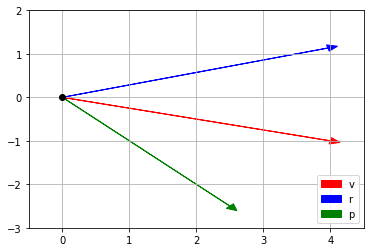

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# vector v
ax.arrow(0,0,v[0],v[1],head_width=0.15,head_length=0.15,color = 'r',label='v')
# vector r
ax.arrow(0,0,r[0],r[1],head_width=0.15,head_length=0.15,color = 'b',label='r')
# vector p
ax.arrow(0,0,p[0],p[1],head_width=0.15,head_length=0.15,color = 'g',label='p')

# Origin point
plt.plot(0,0,'ok')
plt.xlim(-0.5, 4.5)
plt.ylim(-3, 2)
plt.grid(b=True, which='major')
plt.legend()
plt.show()

### d)

Call the norm of $v$ as **norm_v**, $r$ as **norm_r**, $p$ as **norm_p**.

In [49]:
norm_v = np.linalg.norm(v)
norm_r = np.linalg.norm(r)
norm_p = np.linalg.norm(p)

print("Norm of v : ", norm_v)
print("Norm of r : ", norm_r)
print("Norm of p : ", norm_p)

Norm of v :  4.123105625617661
Norm of r :  4.123105625617661
Norm of p :  3.5355339059327378


We see that $v$ and $r$ has the same norm. This is just we expected, because $r$ is just the rotated version $v$ by $30$ degrees. Rotation in a plane or space does not affect the norm of a vector, it just changes its angles with respect to the axes. If we look from the polar coordinates aspect, rotation just changes the angle entry of the coordinates, the length coordinate is still the same. It is because that the columns of $R$ has norm $1$ by the property $cos^2(theta) + sin^2(theta) = 1$. So, if we represent columns of $R$ by $r_1$ and $r_2$, we have $r = v_1 * r_1 + v_2 * r_2$. Then, $||r|| = \sqrt{v_1^2 * ||r_1||^2 + (v_1 * v_2) * (r_1^T r_2) + v_2^2 * ||r_2||^2} = \sqrt{v_1^2 + v_2^2} = ||v||$. Here, $r_1^T r_2$ equals to $0$ since the columns of $R$ is orthogonal by the calculation $cos(\theta) * -sin(\theta) + sin(\theta) * cos(\theta) = 0$.

We also observe that $p$ is shorter than $v$. This result is again expected, since projection of a vector to a line can affect the projected vector length. This length is closely related to the angle between $v$ and $l$, namely $cos(\theta_v - \theta_l)$ where $\theta_v$ is the angle $v$ makes with horizontal and $\theta_l$ is the angle $l$ makes with horizontal. Thus, the projected vector has the same norm with the original vector when the vector and projected line has angle $0$ or $\pi$ radians($cos(\theta_v - \theta_l) = -1 or 1$). The projected vector has length $0$ when the original vector and the line are orthogonal($cos(\theta_v - \theta_l) = 0$). Any other angle between the original vector and the line gives a projected vector length shorter than the original vector($0 < |cos(\theta_v - \theta_l)| < 1$).

Now let us evaluate the expected length of $p$ by the formula $||proj_v|| = ||v|| cos(\theta_v - \theta_l)$.

In [50]:
expec_norm_p = norm_v * np.cos(theta_v - theta_l)
print("Expected norm of p : ", norm_p)

Expected norm of p :  3.5355339059327378


This result is the same as the real **norm_v**, proving our arguments above.

### e)

We first plot the columns of $R$.

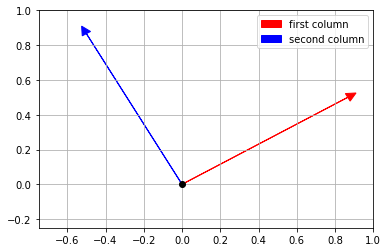

In [51]:
fig, ax = plt.subplots()

ax.arrow(0,0,R[0,0],R[1,0],head_width=0.05,head_length=0.05,color = 'r',label='first column')
ax.arrow(0,0,R[0,1],R[1,1],head_width=0.05,head_length=0.05,color = 'b',label='second column')

plt.plot(0,0,'ok')
plt.xlim(-0.75, 1)
plt.ylim(-0.25, 1)
plt.grid(b=True, which='major')
plt.legend()
plt.show()

It can be seen that these 2 columns are orthogonal to each other. It is also proved by taking inner product of these columns, leading to
$cos(\theta) \times -sin(\theta) + sin(\theta) \times cos(\theta) = 0$.
Therefore, a rotation matrix must have orthogonal columns. Another property obtained from $R$ is that each columns has norm $1$. This is also proved by taking norm of each columns indepedently. First columns leads to
$\sqrt{cos^2(\theta) + sin^2(\theta)} = 1$
and the second columns leads to
$\sqrt{(-sin(\theta))^2 + cos^2(\theta)} = 1$.
With both columns are orthogonal to each other with their norms being $1$, we conclude that they are orthonormal and $R$ is an orthogonal matrix. 

We now plot the columns of $P$.

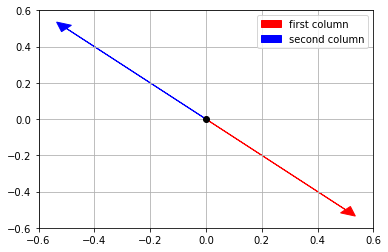

In [52]:
fig, ax = plt.subplots()

ax.arrow(0,0,P[0,0],P[1,0],head_width=0.05,head_length=0.05,color = 'r',label='first column')
ax.arrow(0,0,P[0,1],P[1,1],head_width=0.05,head_length=0.05,color = 'b',label='second column')

plt.plot(0,0,'ok')
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.grid(b=True, which='major')
plt.legend()
plt.show()

It can be seen that these 2 columns are the reverse of each other, meaning if $i$th entry of first column is $a$, then the $i$th entry of second column is $-a$. So if we call the columns of $P$ as $p_1$ and $p_2$, $p_1 + p_2$ is the $0$ vector. This is not a general property of projection matrices, it is just the case for our special instance $P$. To prove this argument, we take the inner product of $p_1$ and $p_2$ in 2 ways.

$p_1^T p_2 = 0.5 \times -0.5 + -0.5 \times 0.5 = -0.25 - 0.25 = -0.5$
$p_1^T p_2 = ||p_1|| \times ||p_2|| \times cos(\theta) = \dfrac{1}{\sqrt{2}} \times \dfrac{1}{\sqrt{2}} \times cos(\theta) = 0.5 \times cos(\theta)$

With $\theta$ being the angle between $p_1$ and $p_2$, above calculations lead to $\theta = \pi$. Then this proves that the first column is the reverse of the second column. But this shows another property. Since $p_1 + p_2 = 0$, they are linearly dependent. So $P$ matrix has linearly dependent columns and they cover only 1 dimension in 2 dimensional space.

## Question 2

Now, let $v$ denote the $1x5$ vector with its entries sampled from the unit Gaussion distribution.

In [53]:
v = np.random.normal(size=5)
# I took note of the resulting vector from line 1, and pasted it into line 3
v = np.array([-0.16047389,  0.75734967,  2.24803624,  0.04153923, -0.76337355])
v

array([-0.16047389,  0.75734967,  2.24803624,  0.04153923, -0.76337355])

### a)

If we take look at entries of $v$ and create a vector $s$ such that $s_i = \text{the ascending order of } v_i$, we obtain $s = [2, 4, 5, 3, 1]$. Then, $S$ should be fixing this order to $[1, 2, 3, 4, 5]$. Therefore, we take $S = \begin{bmatrix}
0 & 0 & 0 & 0 & 1\\
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0
\end{bmatrix}$.

In [54]:
S = np.array([[0,0,0,0,1],[1,0,0,0,0],[0,0,0,1,0],[0,1,0,0,0],[0,0,1,0,0]])
S

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0]])

Then, the sorted vector is $v_s = Sv$.

In [55]:
v_s = S @ v
v_s

array([-0.76337355, -0.16047389,  0.04153923,  0.75734967,  2.24803624])

### b)

The reverser matrix should create such a vector $v_k$ that $(v_k)_i = v_{6 - i}$. Then, we take $K = \begin{bmatrix}
0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 0
\end{bmatrix}$.

In [56]:
K = np.array([[0,0,0,0,1],[0,0,0,1,0],[0,0,1,0,0],[0,1,0,0,0],[1,0,0,0,0]])
K

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

Then, the reversed vector is $v_k = Kv_s$.

In [57]:
v_k = K @ v_s
v_k

array([ 2.24803624,  0.75734967,  0.04153923, -0.16047389, -0.76337355])

### c)

Now we create $v_z = S(Kv)$.

In [58]:
v_z = S @ (K @ v)
v_z

array([-0.16047389, -0.76337355,  0.75734967,  0.04153923,  2.24803624])

Obviously, $v_z \neq v_k$. It is because reversing $v$ first messes up the sorting procedure we implemented using $S$ completely. $S$ only sorts the special $v$ vector we generated, not a random configuration. So to get a sorted vector in descending order, the procedure in this part can not be used.

### d)

Reversing every column of $S$ using $K$ corresponds to the matrix operation $KS$. Hence, $\hat{S} = KS$.

In [59]:
S_hat = K @ S
S_hat

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

Then, to sort $v$, we apply $v_h = \hat{S}v$.

In [60]:
v_h = S_hat @ v
v_h

array([ 2.24803624,  0.75734967,  0.04153923, -0.16047389, -0.76337355])

As it is seen, we get $v_h = v_k$. Because we actually did the same multiplication, but the internal order of these multiplications were different. But this does not effect our final result since $(KS)v = K(Sv)$ by the property of matrix multiplications.

### e)

In part **2c**, we argued about the statement $KSv = SKv$. But since $KS \neq SK$, we saw that the statement was wrong. This shows that the matrix multiplication is not commutative.

In part **2d**, we argued about the statement $(KS)v = K(Sv)$. This statement is shown to be true since the matrix multiplication is associative.

## Question 3

We initialize the vector $v = (1, -4, 3, 7, 0, -3)$.

In [61]:
v = np.array([1, -4, 3, 7, 0, -3])

### a)

We need a $T$ such that $Tv = \hat{v}$. $T$ should have a form that can hold a running weighted sum that is evaluated using $v_i, v_{i+1}, v_{i+2}$ for each entry $\hat{v}_i$. Then, $T$ can be defined as $T = \begin{bmatrix}
0.1 & 0.3 & 0.6 & 0 & 0 & 0\\
0 & 0.1 & 0.3 & 0.6 & 0 & 0\\
0 & 0 & 0.1 & 0.3 & 0.6 & 0\\
0 & 0 & 0 & 0.1 & 0.3 & 0.6
\end{bmatrix}$

In [62]:
T = np.array([[0.1,0.3,0.6,0,0,0],[0,0.1,0.3,0.6,0,0],[0,0,0.1,0.3,0.6,0],[0,0,0,0.1,0.3,0.6]])
T

array([[0.1, 0.3, 0.6, 0. , 0. , 0. ],
       [0. , 0.1, 0.3, 0.6, 0. , 0. ],
       [0. , 0. , 0.1, 0.3, 0.6, 0. ],
       [0. , 0. , 0. , 0.1, 0.3, 0.6]])

$\hat{v}$ is then $Tv$.

In [63]:
v_hat = T @ v
v_hat

array([ 0.7,  4.7,  2.4, -1.1])

### b)

Yes, $T$ corresponds to a linear function. Call this function $f$. Then we can define $f:R^6 \rightarrow R^4$ such that $f(x) = Tx$. To prove its linearity, consider $f(\alpha x + \beta y)$. We use matrix multiplication properties to show :

$f(\alpha x + \beta y) = T(\alpha x + \beta y) = T \alpha x + T \beta y = \alpha Tx + \beta Ty = \alpha f(x) + \beta f(y)$

This expression proves that $f(x)$ is linear, which corresponds to $T$.

### c)

Suppose now that such a $\hat{T}$ exists. Then, we get

$Tv = \hat{v} \rightarrow \hat{T} Tv = \hat{T}\hat{v} = v \rightarrow \hat{T} Tv = v$

Since $v$ is a nonzero vector, we can cancel it out by using matrix multiplication properties, getting

$\hat{T} T = I$

Thus, T should have a left inverse. However, if we look at $T$ closely, it is a $4x6$ vector, meaning it is wide. A wide vector can not have linearly independent columns. So, it also can not have a left inverse. This leads to a contradiction. Our first assumption that a perfect $\hat{T}$ exists was wrong. Such a $\hat{T}$ can not exist.

### d)

We create a system of linear equations for the statement $\hat{T} \hat{v} = v$. Since $\hat{v}$ is a $4x1$ vector and $v$ is a $6x1$ vector, $\hat{T}$ should have dimensions $6x4$.

$\hat{T}_{11}\hat{v}_1 + \hat{T}_{12}\hat{v}_2 + \hat{T}_{13}\hat{v}_3 + \hat{T}_{14}\hat{v}_4 = v_1\\
\hat{T}_{21}\hat{v}_1 + \hat{T}_{22}\hat{v}_2 + \hat{T}_{23}\hat{v}_3 + \hat{T}_{24}\hat{v}_4 = v_2\\
\hat{T}_{31}\hat{v}_1 + \hat{T}_{32}\hat{v}_2 + \hat{T}_{33}\hat{v}_3 + \hat{T}_{34}\hat{v}_4 = v_3\\
\hat{T}_{41}\hat{v}_1 + \hat{T}_{42}\hat{v}_2 + \hat{T}_{43}\hat{v}_3 + \hat{T}_{44}\hat{v}_4 = v_4\\
\hat{T}_{51}\hat{v}_1 + \hat{T}_{52}\hat{v}_2 + \hat{T}_{53}\hat{v}_3 + \hat{T}_{54}\hat{v}_4 = v_5\\
\hat{T}_{61}\hat{v}_1 + \hat{T}_{62}\hat{v}_2 + \hat{T}_{63}\hat{v}_3 + \hat{T}_{64}\hat{v}_4 = v_6$

Since $\hat{T}$ is a tall matrix($m > n$), this is a over-determined system. Because, the number of equations are greater than the number of variables in $\hat{v}$.

### e)

For this part, we want to approximate $v$ in a way that $||\hat{v} - Tv||$ is minimized. (Here, $v$ in $||\hat{v} - Tv||$ is referred as the unknown $v$ vectors, not the one we know in the previous parts). This is a least square problem. The only restriction we have here is that any candidate $\tilde{v}$ should satisfy the equation

$\hat{T}\hat{v} = \tilde{v}$

Say that we have found a $\tilde{v}$ such that

$||\hat{v} - T\tilde{v}|| \leq ||\hat{v} - Tv||$ for all $v$ that are candidate for this problem.

Now, we rewrite our minimization expression by replacing $\tilde{v}$ with $\hat{T}\hat{v}$. We can do this due to the restriction $\hat{T}\hat{v} = \tilde{v}$. Then, we get

$||\hat{v} - T\tilde{v}|| = ||\hat{v} - T\hat{T}\hat{v}|| = ||(I - T\hat{T})\hat{v}||$

The minimization problem now looks more clear. If we are able to fix a $\hat{T}$ such that $I = T\hat{T}$, the minimization problem leads to a distance of $0$. Therefore, we will be sure that the $\tilde{v}$ is the best least squares approximation for $v$ given in the question.

Now, we focus on $T$. $T$ is a $4x6$ matrix, which is wide. We also see that the rows of $T$ are linearly independent. It can be verified by like this : If $\beta_i$ is the coefficient of row $i$ of $T$ which can be denoted by $t_i^T$, then $\sum_{i=1}^4 \beta_i t_i^T = 0$. Since all the first entries of these vectors are $0$ except $t_1^T$, $\beta_1 = 0$. By a similar argument, $\beta_4 = 0$. Now we have only 2 vectors to consider, but only $t_1^T$ has now a nonzero number for the second entry. Then, $\beta_2 = 0$. By a similar argument again, we get also $\beta_3 = 0$. Hence, we proved that the rows of $T$ are linearly independent. This property allows us to say that $T$ has a right inverse. Let us call it by $T^{\dagger}$. We have $T^{\dagger} = T^T (T T^T)^{-1}$.

Lastly, we go back to the equation we have been wanting to satify, which is $I = T\hat{T}$. We were looking for a possible $\hat{T}$. Since we have the right inverse of $T$ denoted by $T^{\dagger}$, we can use it. We know that $TT^{\dagger} = I$. So, take $\hat{T} = T^{\dagger} = T^T (T T^T)^{-1}$.

We can easily generate the approximation of $v$ called $\tilde{v}$ by the equation $\hat{T}\hat{v} = \tilde{v}$. Below, I implement the idea I explained above and print $T^{\dagger}$ and $\tilde{v}$.

In [64]:
# T^hat = right inverse of T
T_hat = T.T @ np.linalg.inv(T @ T.T)
T_hat

array([[ 0.27750658, -0.13845465,  0.02370752,  0.00723631],
       [ 0.69406508, -0.06896774, -0.07977855,  0.04541643],
       [ 1.27338303,  0.05755964,  0.03593802, -0.02391427],
       [-0.75236903,  1.64938147, -0.00467259,  0.00438773],
       [ 0.16395401, -0.83428401,  1.66301329,  0.00179185],
       [ 0.04341783,  0.14224509, -0.83072788,  1.66503946]])

In [65]:
# v_tilde
v_tilde = T_hat @ v_hat
v_tilde

array([-0.40754414, -0.07972939,  1.27445538,  7.20939387,  0.18289383,
       -3.1263459 ])

Let us also see the residual vector $r = v - \tilde{v}$ and its norm.

In [66]:
r = v - v_tilde
print("r :", r)
print("Norm of r :", np.linalg.norm(r))

r : [ 1.40754414 -3.92027061  1.72554462 -0.20939387 -0.18289383  0.1263459 ]
Norm of r : 4.518900933913123


### f)

Yes, $\hat{T}$ is a pseudo inverse of $T$. To be more specific, $\hat{T}$ is the right inverse of $T$. Its reason and derivation is explained in detail in part **Q3e**.


## Question 4

### a)

$A + B$ is not always invertible. Take $A = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}$ and $B = \begin{bmatrix}
-1 & 0\\
0 & -1
\end{bmatrix}$. They are both invertible since $A = I$ and $B = -I$. But $A + B = \begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix}$, which is singular and not invertible.

### b)

$\begin{bmatrix}
A & 0\\
0 & B
\end{bmatrix}$ is invertible. Since $A$ and $B$ are both invertible they have linearly independent rows and columns. Therefore, $\begin{bmatrix}
A & 0\\
0 & B
\end{bmatrix}$ must have linearly independent rows and columns. So it is invertible. Its inverse is $\begin{bmatrix}
A^{-1} & 0\\
0 & B^{-1}
\end{bmatrix}$.

To test, we calculate $\begin{bmatrix}
A & 0\\
0 & B
\end{bmatrix} \begin{bmatrix}
A^{-1} & 0\\
0 & B^{-1}
\end{bmatrix} = \begin{bmatrix}
A^{-1} & 0\\
0 & B^{-1}
\end{bmatrix} \begin{bmatrix}
A & 0\\
0 & B
\end{bmatrix} = \begin{bmatrix}
AA^{-1} & 0\\
0 & BB^{-1}
\end{bmatrix} = \begin{bmatrix}
I_n & 0\\
0 & I_n
\end{bmatrix} = I_{2n}$

### c)

$\begin{bmatrix}
A & 0\\
A+B & B
\end{bmatrix}$ is invertible. Since $A$ and $B$ are both invertible they have linearly independent rows and columns. Therefore, $\begin{bmatrix}
A & 0\\
A+B & B
\end{bmatrix}$ must have linearly independent rows and columns. So it is invertible. Its inverse is $\begin{bmatrix}
A^{-1} & 0\\
-A^{-1}-B^{-1} & B^{-1}
\end{bmatrix}$.

To test, we calculate $\begin{bmatrix}
A & 0\\
A+B & B
\end{bmatrix} \begin{bmatrix}
A^{-1} & 0\\
-A^{-1}-B^{-1} & B^{-1}
\end{bmatrix} = \begin{bmatrix}
A^{-1} & 0\\
-A^{-1}-B^{-1} & B^{-1}
\end{bmatrix} \begin{bmatrix}
A & 0\\
A+B & B
\end{bmatrix} = \begin{bmatrix}
AA^{-1} & 0\\
0 & BB^{-1}
\end{bmatrix} = \begin{bmatrix}
I_n & 0\\
0 & I_n
\end{bmatrix} = I_{2n}$

### d)

$ABA$ is invertible. Since $A$ and $B$ are both invertible, $(ABA)^{-1} = A^{-1}B^{-1}A^{-1}$.

To test, we have $ABA \ A^{-1}B^{-1}A^{-1} = AB \ B^{-1}A^{-1} = A \ A^{-1} = I$ and $A^{-1}B^{-1}A^{-1} \ ABA = A^{-1}B^{-1} \ BA = A^{-1} \ A = I$.

## Question 5

### a)

In [67]:
x = np.linspace(-1,1,20)
x

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

### b)

The noise vector is denoted by $e$.

In [68]:
# period
T = 1.5
# noise vector
e = np.random.normal(scale=0.1, size=20)
y = np.sin(2 * np.pi * x / T) + e
y

array([ 0.86160785,  0.590284  ,  0.16822014, -0.13318866, -0.7326916 ,
       -0.88892874, -0.96636996, -0.78874945, -0.58608366, -0.13851095,
        0.18197885,  0.59994659,  0.84957588,  1.00333502,  0.85063015,
        0.51852476,  0.2545871 , -0.20231328, -0.57330311, -0.90065791])

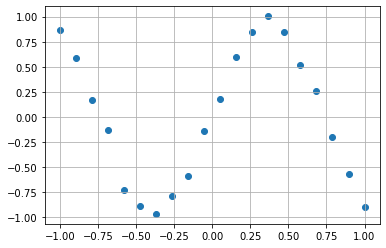

In [69]:
fig, ax = plt.subplots()

ax.scatter(x, y)
plt.grid(b=True, which='major')
plt.show()

### c)

To approximate $y$ with a polynomial of degree at most 10, we need to have $p = 11$, so we need a $20x11$ Vandermonde matrix $V$. For entries of $V$, we use $V_{ij} = x_i^j$.

In [70]:
V = np.array([[x[i]**j for j in range(11)] for i in range(20)])
V

array([[ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -8.94736842e-01,  8.00554017e-01,
        -7.16285173e-01,  6.40886734e-01, -5.73424972e-01,
         5.13064449e-01, -4.59057665e-01,  4.10735805e-01,
        -3.67500457e-01,  3.28816199e-01],
       [ 1.00000000e+00, -7.89473684e-01,  6.23268698e-01,
        -4.92054235e-01,  3.88463870e-01, -3.06682003e-01,
         2.42117370e-01, -1.91145292e-01,  1.50904178e-01,
        -1.19134878e-01,  9.40538507e-02],
       [ 1.00000000e+00, -6.84210526e-01,  4.68144044e-01,
        -3.20309083e-01,  2.19158846e-01, -1.49950790e-01,
         1.02597909e-01, -7.01985691e-02,  4.80305999e-02,
        -3.28630420e-02,  2.24852393e-02],
       [ 1.00000000e+00, -5.78947368e-01,  3.35180055e-01,
        -1.94051611e-01,  1.12345670e-01, -6.50422297e-02,
  

### d)

Since the $QR$ decomposition is done explicitly in the previous assignment, we use the Gram Schmidt function defined in Assignment 1.

In [71]:
def gramSchmidt(A) :
    Q = []
    m = len(A)
    n = len(A[0])
    
    # Iterations
    for i in range(n) :
        # Orthogonalization
        q = np.array(A[:,i], dtype=float)
        for j in range(i) :
            q -= (Q[j] @ A[:,i]) * Q[j]
        
        # Test if the independency is preserved
        indep = False
        for j in range(n) :
            ## Specifying an interval for the equality with 0
            if (abs(q[j] > 10**(-15))) :
                indep = True
        
        if not indep :
            print("A is linearly dependent!")
            return np.array(Q).T
        else :
            # Normalization
            q /= np.sqrt(sum(np.square(q)))
            Q.append(q)
    
    return np.array(Q).T 

Q = gramSchmidt(V)
Q

array([[ 0.2236068 , -0.3683942 ,  0.43019174, -0.43760939,  0.40514757,
        -0.34694765,  0.27676848, -0.20629104,  0.14377084, -0.09360962,
         0.05681889],
       [ 0.2236068 , -0.32961586,  0.29434172, -0.16122451, -0.02132356,
         0.20086443, -0.33503553,  0.40172466, -0.40104498,  0.34980438,
        -0.27213256],
       [ 0.2236068 , -0.29083753,  0.17358614,  0.03838679, -0.23455912,
         0.32260045, -0.2670573 ,  0.09771681,  0.1135033 , -0.29068251,
         0.38577033],
       [ 0.2236068 , -0.25205919,  0.06792501,  0.1702567 , -0.29309437,
         0.21876678,  0.00085687, -0.22417386,  0.31647389, -0.22982177,
         0.01811872],
       [ 0.2236068 , -0.21328085, -0.02264167,  0.2434174 , -0.24814766,
         0.0334774 ,  0.21378865, -0.28452836,  0.12218296,  0.1418635 ,
        -0.30599521],
       [ 0.2236068 , -0.17450252, -0.09811391,  0.26690108, -0.14362042,
        -0.13802716,  0.2757688 , -0.12358302, -0.16090761,  0.28879873,
        -0.133

In [72]:
# V = QR means R = Q^T * V
R = Q.T @ V
R

array([[ 4.47213595e+00, -8.32667268e-17,  1.64762904e+00,
        -2.22044605e-16,  1.08898695e+00, -2.22044605e-16,
         8.53990295e-01, -1.38777878e-16,  7.26806868e-01,
        -1.94289029e-16,  6.48550124e-01],
       [-9.43689571e-16,  2.71448357e+00, -2.22044605e-16,
         1.79411573e+00, -3.33066907e-16,  1.40695665e+00,
        -3.88578059e-16,  1.19742081e+00, -4.44089210e-16,
         1.06849213e+00, -2.22044605e-16],
       [ 4.99600361e-16,  3.33066907e-16,  1.46813359e+00,
         0.00000000e+00,  1.37924382e+00, -1.66533454e-16,
         1.25555326e+00, -5.55111512e-17,  1.15990550e+00,
         0.00000000e+00,  1.08934122e+00],
       [-7.21644966e-16,  1.83186799e-15, -4.44089210e-16,
         7.74796385e-01, -4.44089210e-16,  9.37195997e-01,
        -5.55111512e-16,  9.70697356e-01, -3.88578059e-16,
         9.69119020e-01, -3.33066907e-16],
       [-6.66133815e-16, -6.10622664e-16, -6.10622664e-16,
         5.55111512e-16,  4.02707125e-01,  1.11022302e-15,
  

Now, we plot each first 5 column of $Q$ against $x$ as a scatter plot, one by one.

1st column:

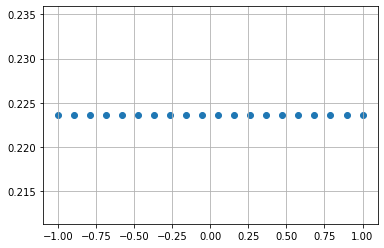

In [73]:
fig, ax = plt.subplots()

ax.scatter(x, Q[:,0])
plt.grid(b=True, which='major')
plt.show()

2nd column:

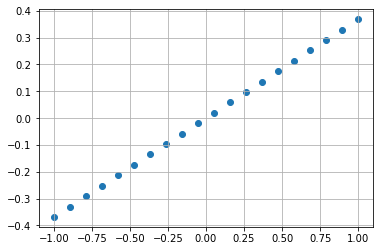

In [74]:
fig, ax = plt.subplots()

ax.scatter(x, Q[:,1])
plt.grid(b=True, which='major')
plt.show()

3rd column:

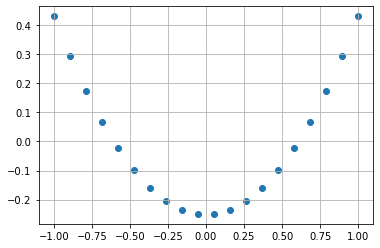

In [75]:
fig, ax = plt.subplots()

ax.scatter(x, Q[:,2])
plt.grid(b=True, which='major')
plt.show()

4th column:

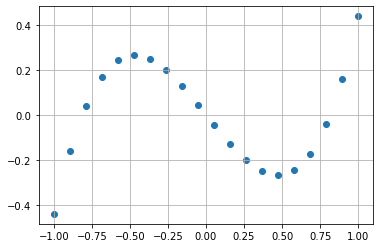

In [76]:
fig, ax = plt.subplots()

ax.scatter(x, Q[:,3])
plt.grid(b=True, which='major')
plt.show()

5th column:

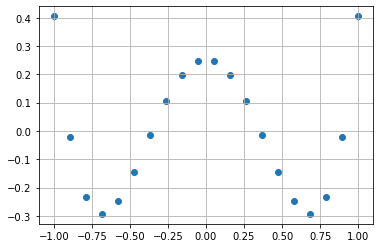

In [77]:
fig, ax = plt.subplots()

ax.scatter(x, Q[:,4])
plt.grid(b=True, which='major')
plt.show()

### e)

We should use the least squares method to minimize $||y - Qc^{(j)}||$. But there is a restriction here. The entries of $c_i^{(j)} = 0$ if $j < i \leq 10$. This affects our least squares solution. We can solve this issue by a little trick. We only consider the first $j + 1$ columns of $Q$ and first $j + 1$ entries of $c_i^{(j)}$. We do not need to consider the rest of the entries since we will be sure that $Q_{zi}c_i^{(j)} = 0$ if $j < i$ and for all $z$ in $1 \leq z \leq 20$.

Now, let us define some notations. Let $Q^{(j)}$ denote the $20x(j+1)$ matrix with first $j + 1$ columns of $Q$. Let $s^{(j)}$ denote the nonzero entries of $c^{(j)}$. Then, our objective now is to minimize $||y - Q^{(j)}s^{(j)}||$. We can solve this problem directly using least square methods. We try to find the entries of $s^{(j)}$ and know $y$ and $Q^{(j)}$. Using our derivations from lectures and the book, we can conclude that the least square solution of this problem is $\hat{s^{(j)}} = Q^{+(j)} y$, with $Q^{+(j)}$ meaning the left inverse of $Q^{(j)}$. Since the columns of $Q^{(j)}$ are linearly independent and $Q^{(j)}$ is tall, we know for sure that $Q^{+(j)}$ exists. In addition, since we have $Q$ as an orthogonal matrix, we have the property $(Q^{(j)})^T = Q^{+(j)}$. Then, we get the least square solution $\hat{s^{(j)}} = (Q^{(j)})^T y$.

Lastly, we recover $c^{(j)}$ from $s^{(j)}$ by appending $0$ to its end until the size of $s^{(j)}$ is $11$. Then, $c^{(j)} = (\begin{bmatrix}
(s^{(j)})^T & 0_{11 - j - 1}
\end{bmatrix})^T$. This concludes my idea for the solution. Now, I define a function that calculates $c^{(j)}$ for a given $j$.

In [78]:
def leastSolver(j) :
    # Q^(j)
    Qj = Q[:, 0:(j+1)]
    # the least square solution for s^(j)
    sj = Qj.T @ y
    # the resulting c^(j)
    cj = np.append(sj, np.zeros(11-j-1))
    return cj

Firstly, we take $j = 0$ and plot $x$ versus original $y$ and approximated value $Qc^{(0)}$.

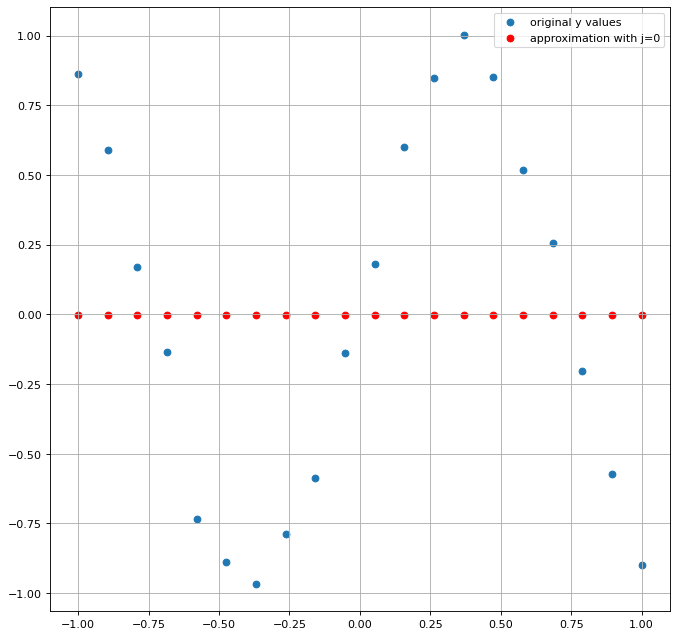

In [79]:
c0 = leastSolver(0)
y0 = Q @ c0

fig, ax = plt.subplots(figsize=(10,10), dpi=80)

ax.scatter(x, y,label='original y values')
ax.scatter(x, y0,color='r',label='approximation with j=0')
plt.grid(b=True, which='major')
plt.legend()
plt.show()

We now take $j=5$ and plot $x$ versus original $y$ and approximated value $Qc^{(5)}$.

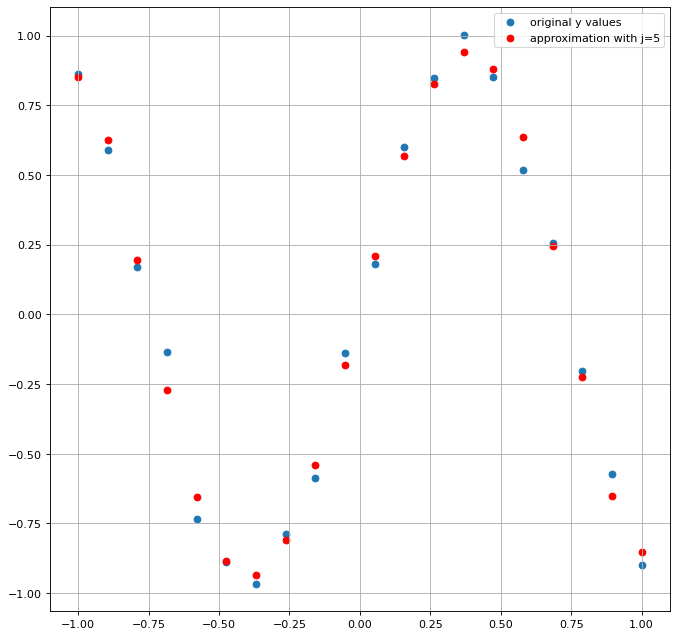

In [80]:
c5 = leastSolver(5)
y5 = Q @ c5

fig, ax = plt.subplots(figsize=(10,10), dpi=80)

ax.scatter(x, y,label='original y values')
ax.scatter(x, y5,color='r',label='approximation with j=5')
plt.grid(b=True, which='major')
plt.legend()
plt.show()

We finally take $j=10$ and plot $x$ versus original $y$ and approximated value $Qc^{(10)}$.

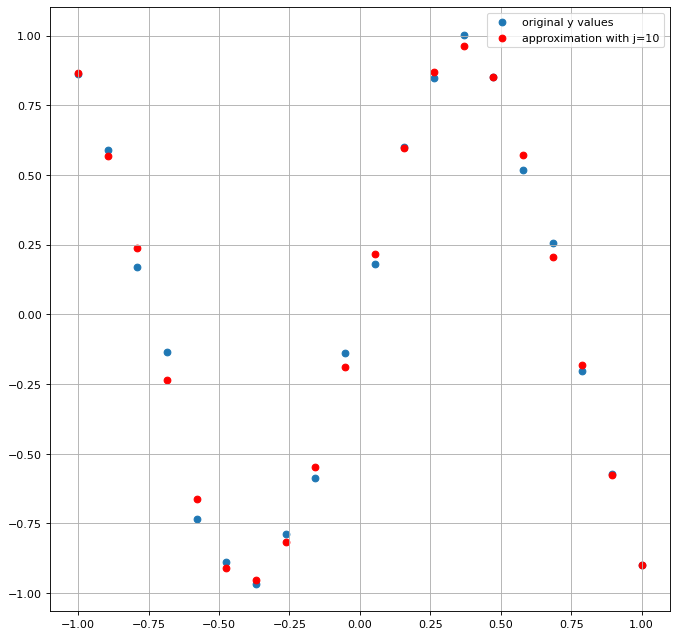

In [81]:
c10 = leastSolver(10)
y10 = Q @ c10

fig, ax = plt.subplots(figsize=(10,10), dpi=80)

ax.scatter(x, y,label='original y values')
ax.scatter(x, y10,color='r',label='approximation with j=10')
plt.grid(b=True, which='major')
plt.legend()
plt.show()

We see that the approximation with $j = 0$ was very unsatisfactory. Because for $j = 0$ we only considered the first column of $Q$, which was derived from the first column of $V$ consisting only $1$s. So from part $d$, the first column of $Q$ consists of only $0.224$s. The $c^{(0)}$ then becomes a vector with single nonzero entry. And the vector $y^{(0)}$ has the same entries for each index. This approximation uses only constants to approximate and is not enough for us.

If we look at both approximations with $j = 5$ and $j = 10$, we observe that these approximations are very close to each other and they are both very good at approximating $y$. Then, we understand that using a $5$th order polynomial approximation is enough for getting a reasonable result for approximating sin functions in our system. The $10$th order approximation does not contribute much to our shape, since it was already satisfactory. But the $10$th order polynomial approximation requires bigger matrices and more computations for us for a similar result with $5$th order polynomial approximation, therefore, it reduces the efficiency of our work.

### f)

We use the same approach taken in **Q5e**. This time, we minimize $||y - Vc^{(j)}||$. Again, with the same arguments, $c_i^{(j)} = 0$ if $j < i \leq 10$. Taking this into account, we only consider the first $j + 1$ columns of $V$ and first $j + 1$ entries of $c_i^{(j)}$. We do not need to consider the rest of the entries since we will be sure that $V_{zi}c_i^{(j)} = 0$ if $j < i$ and for all $z$ in $1 \leq z \leq 20$.

Again, we let $V^{(j)}$ denote the $20x(j+1)$ matrix with first $j + 1$ columns of $V$ like in $Q$. Let $s^{(j)}$ denote the nonzero entries of $c^{(j)}$. We now mizimize $||y - V^{(j)}s^{(j)}||$. We can solve this problem directly using least square methods. We try to find the entries of $s^{(j)}$ and know $y$ and $V^{(j)}$. Using our derivations in lectures and the book, we can conclude that the least square solution of this problem is $\hat{s^{(j)}} = V^{+(j)} y$, with $V^{+(j)}$ meaning the left inverse of $V^{(j)}$. We assume 
the columns of $V^{(j)}$ are linearly independent and $V^{(j)}$ is tall(it is $20x11$), we know for sure that $V^{+(j)}$ exists. Then, we get the least squares solution

$\hat{s^{(j)}} = ((V^{(j)})^T (V^{(j)}))^{-1} (V^{(j)})^T y$

Lastly, again, we recover $c^{(j)}$ from $s^{(j)}$ by appending $0$ to its end until the size of $s^{(j)}$ is $11$. Then, $c^{(j)} = (\begin{bmatrix}
(s^{(j)})^T & 0_{11 - j - 1}
\end{bmatrix})^T$. This concludes my idea for the solution. Defining a new function similar to function **leastSolver** above, I calculate the approximations.

In [82]:
def leastSolver2(j) :
    # V^(j)
    Vj = V[:, 0:(j+1)]
    # the least square solution for s^(j)
    sj = np.linalg.inv(Vj.T @ Vj) @ Vj.T @ y
    # the resulting c^(j)
    cj = np.append(sj, np.zeros(11-j-1))
    return cj

Firstly, we take $j = 0$ and plot $x$ versus original $y$ and approximated value $Vc^{(0)}$.

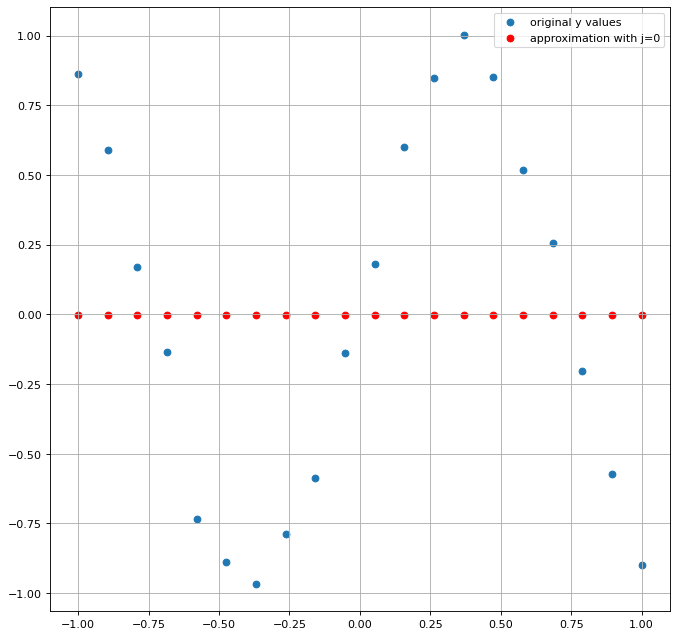

In [83]:
c02 = leastSolver2(0)
y02 = V @ c02

fig, ax = plt.subplots(figsize=(10,10), dpi=80)

ax.scatter(x,y,label='original y values')
ax.scatter(x,y02,color='r',label='approximation with j=0')
plt.grid(b=True, which='major')
plt.legend()
plt.show()

Now, we take $j = 5$ and plot $x$ versus original $y$ and approximated value $Vc^{(5)}$.

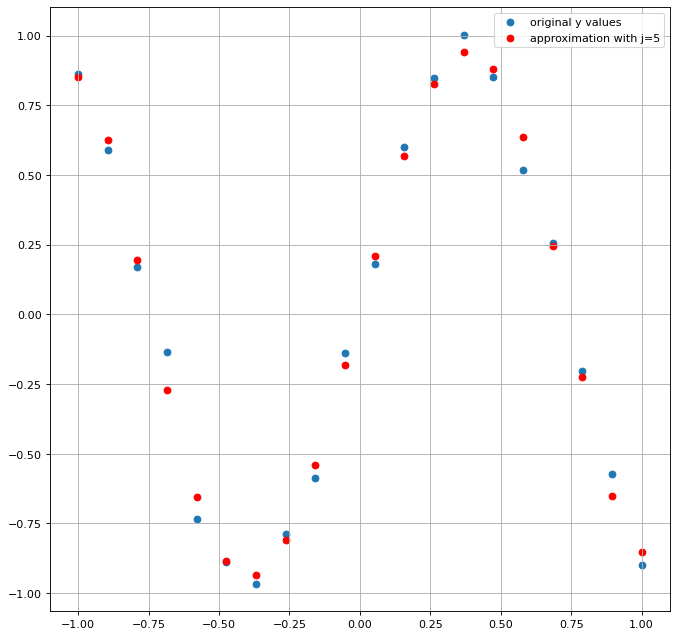

In [84]:
c52 = leastSolver2(5)
y52 = V @ c52

fig, ax = plt.subplots(figsize=(10,10), dpi=80)

ax.scatter(x,y,label='original y values')
ax.scatter(x,y52,color='r',label='approximation with j=5')
plt.grid(b=True, which='major')
plt.legend()
plt.show()

Now, we take $j = 10$ and plot $x$ versus original $y$ and approximated value $Vc^{(10)}$.

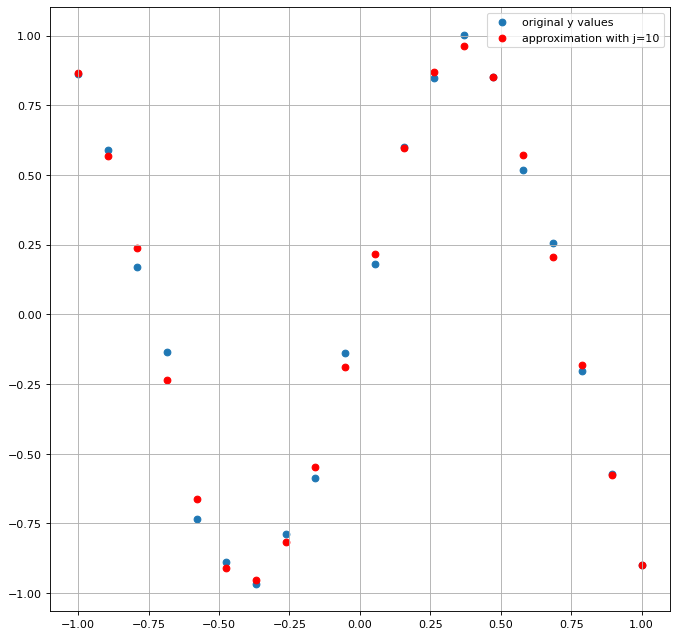

In [85]:
c102 = leastSolver2(10)
y102 = V @ c102

fig, ax = plt.subplots(figsize=(10,10), dpi=80)

ax.scatter(x,y,label='original y values')
ax.scatter(x,y102,color='r',label='approximation with j=10')
plt.grid(b=True, which='major')
plt.legend()
plt.show()

The approximation using $V$ with $j = 0$, $j = 5$ and $j = 10$ is nearly the same as done with using $Q$. From the plots, it is seen that the accuracy of approximations for both versions are very similar. Also, for both cases, for $j = 5$ and $j = 10$, the approximations are very close to the original $y$ values. From the approximation perspective, both of them can said to be have good performances for $j \geq 5$. This result is strongly related to the columns of $V$ and $Q$. Since $Q$ is the orthogonal matrix derived from $V$, $Q$ and $V$ both span the same subspace. They just give different basis vectors for spanning. As a result, they can cover and approximate all functions at their column space at the same degree. Because the space that the approximation is done is the same for both matrices. However, using $Q$ for approximations are better for our applications. Let us take a look at the $c^{(j)}$ vectors for $j = 5,10$ for both methods.

In [86]:
print("Approximation using Q, j=5 -> c^(5):", c5)
print("Approximation using Q, j=10 -> c^(10):", c10)
print("Approximation using V, j=5 -> c^(5):", c52)
print("Approximation using V, j=10 -> c^(10):", c102)

Approximation using Q, j=5 -> c^(5): [-0.00717934  0.02901793 -0.03318925 -2.76865297  0.03422207  1.00545288
  0.          0.          0.          0.          0.        ]
Approximation using Q, j=10 -> c^(10): [-0.00717934  0.02901793 -0.03318925 -2.76865297  0.03422207  1.00545288
 -0.06740819 -0.12824214 -0.00668681 -0.04566232  0.06631311]
Approximation using V, j=5 -> c^(5): [ 0.01544311  3.74311052 -0.10244126 -9.46998259  0.08498004  4.87481308
  0.          0.          0.          0.          0.        ]
Approximation using V, j=10 -> c^(10): [ 1.30126259e-02  3.87309763e+00  6.09715414e-01 -9.90433018e+00
 -7.82138275e+00  2.94201965e+00  2.51714358e+01  6.11370203e+00
 -3.04241992e+01 -3.90727776e+00  1.24335500e+01]


If we inspect these vectors, for same $j$ values, the entries of the vector that is generated using $Q$ are much smaller than the one generated by using $V$. This is because the columns of $Q$ are orthonormal. To create a sinusodial pattern, we use the columns that give similar shapes when we use $V$. Therefore, to cancel out these shapes and increase the gap between these similar shapes, we need larger entries in $c^{(j)}$. On the other hand, we do not encounter such a situation while using $Q$, because its columns are orthogonal and have less relationship with each other. Hence, every columns of $Q$ gives the plot a different shape. This way, we can have smaller entries in $c^{(j)}$ to approximate $y$.